In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("monthly_milk_production.csv")

In [3]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
df.shape

(168, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [6]:
df.isnull().sum()

Date          0
Production    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


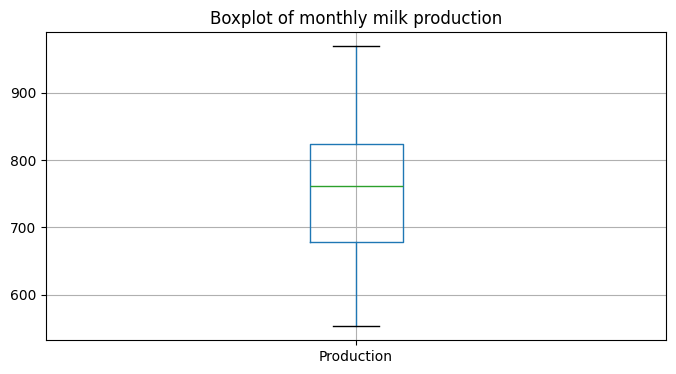

In [9]:
df.boxplot(figsize=(8,4))
plt.title("Boxplot of monthly milk production")
plt.show()

In [16]:
#clearly, we can see there is no outlier

In [10]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df = df.sort_values('Date')

In [13]:
df

,Date,Production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727
...,...,...
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797


In [ ]:
#Scale production value

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

In [17]:
scaler = MinMaxScaler()
df['scaled'] = scaler.fit_transform(df[['Production']])

In [18]:
#Create Sequence

In [19]:
def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 12
values = df['scaled'].values
X, y = create_sequences(values, window_size)

In [20]:
# Reshape for RNN input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [25]:
X

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        ...,
        [0.05769231],
        [0.        ],
        [0.06971154]],

       [[0.01923077],
        [0.20913462],
        [0.24759615],
        ...,
        [0.        ],
        [0.06971154],
        [0.11298077]],

       [[0.20913462],
        [0.24759615],
        [0.41826923],
        ...,
        [0.06971154],
        [0.11298077],
        [0.03125   ]],

       ...,

       [[0.62259615],
        [0.52884615],
        [0.625     ],
        ...,
        [0.82451923],
        [0.73317308],
        [0.63461538]],

       [[0.52884615],
        [0.625     ],
        [0.67548077],
        ...,
        [0.73317308],
        [0.63461538],
        [0.65865385]],

       [[0.625     ],
        [0.67548077],
        [0.55048077],
        ...,
        [0.63461538],
        [0.65865385],
        [0.58653846]]], shape=(156, 12, 1))

In [26]:
y

array([0.11298077, 0.03125   , 0.24038462, 0.28846154, 0.45432692,
       0.39182692, 0.25721154, 0.15384615, 0.07211538, 0.08173077,
       0.02884615, 0.10817308, 0.18028846, 0.15625   , 0.32451923,
       0.36538462, 0.52163462, 0.43990385, 0.30048077, 0.20673077,
       0.12259615, 0.13942308, 0.09855769, 0.19471154, 0.25240385,
       0.16586538, 0.375     , 0.40625   , 0.55048077, 0.48798077,
       0.35817308, 0.24038462, 0.14903846, 0.16346154, 0.11778846,
       0.19711538, 0.29807692, 0.19711538, 0.43990385, 0.48557692,
       0.62019231, 0.58894231, 0.4375    , 0.34615385, 0.25961538,
       0.27403846, 0.22115385, 0.32451923, 0.38461538, 0.27403846,
       0.50240385, 0.55528846, 0.68269231, 0.63461538, 0.51442308,
       0.40625   , 0.30769231, 0.32211538, 0.25721154, 0.34855769,
       0.39423077, 0.34375   , 0.53365385, 0.58413462, 0.73317308,
       0.65625   , 0.55288462, 0.44951923, 0.35576923, 0.36778846,
       0.29807692, 0.37980769, 0.43509615, 0.32932692, 0.55769

In [21]:
#Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build Models

In [30]:
def build_rnn():
    model = Sequential()
    model.add(SimpleRNN(64, activation='tanh', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [31]:
def build_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [32]:
def build_gru():
    model = Sequential()
    model.add(GRU(64, activation='tanh', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [33]:
#Train Model

In [34]:
model = build_lstm()   # choose build_rnn(), build_lstm() or build_gru()

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.1842 - val_loss: 0.2487
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0559 - val_loss: 0.0337
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0313 - val_loss: 0.0450
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0328 - val_loss: 0.0318
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0267 - val_loss: 0.0410
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0268 - val_loss: 0.0328
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0253 - val_loss: 0.0278
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0253 - val_loss: 0.0276
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0248 - val_loss: 0.0291
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0245 - val_loss: 0.0291
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0241 - val_loss: 0.0266
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0237 - val_loss: 0.0267
Epoch 13/50


In [35]:
#Evaluation

In [36]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0053
Test Loss: 0.005278921686112881


In [37]:
# Predict
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


In [38]:
# Reverse scaling
pred_original = scaler.inverse_transform(pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

print(pred_original[:10])

[[933.3659 ]
 [945.5181 ]
 [928.6831 ]
 [892.4163 ]
 [847.6889 ]
 [812.28406]
 [786.78204]
 [789.3189 ]
 [801.3592 ]
 [823.7857 ]]


In [ ]:
#Pridiction vs actual value plotting

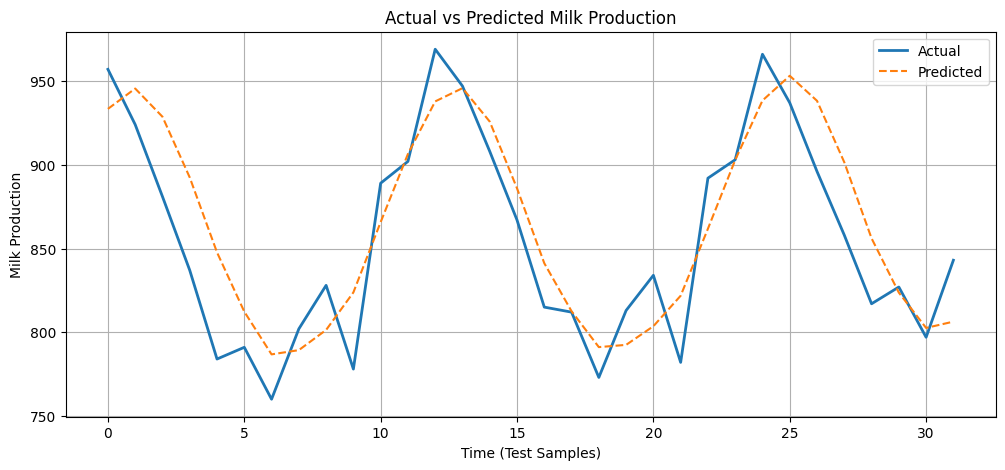

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_original, label="Actual", linewidth=2)
plt.plot(pred_original, label="Predicted", linestyle='dashed')
plt.title("Actual vs Predicted Milk Production")
plt.xlabel("Time (Test Samples)")
plt.ylabel("Milk Production")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Calculating forecasting metrics: RMSE, MAE, MAPE.

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, pred_original))
print("RMSE:",rmse)

RMSE: 30.224963919562214


In [44]:
# MAE
mae = mean_absolute_error(y_test_original, pred_original)
print("MAE:", mae)

MAE: 25.687110900878896


In [45]:
# MAPE
mape = np.mean(np.abs((y_test_original - pred_original) / y_test_original)) * 100
print("MAPE:", mape)

MAPE: 3.041734320258335


In [ ]:
#Comparing the performance of RNN, LSTM, and GRU.

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(model, X_test, y_test, scaler):
    pred = model.predict(X_test)
    pred_original = scaler.inverse_transform(pred)
    y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

    rmse = np.sqrt(mean_squared_error(y_test_original, pred_original))
    mae = mean_absolute_error(y_test_original, pred_original)
    mape = np.mean(np.abs((y_test_original - pred_original) / y_test_original)) * 100

    return rmse, mae, mape, pred_original, y_test_original


# Store performance
results = {}

# RNN 
model_rnn = build_rnn()
model_rnn.fit(X_train, y_train, epochs=40, batch_size=16, verbose=0)
rnn_rmse, rnn_mae, rnn_mape, _, _ = evaluate_model(model_rnn, X_test, y_test, scaler)
results["RNN"] = (rnn_rmse, rnn_mae, rnn_mape)

# LSTM 
model_lstm = build_lstm()
model_lstm.fit(X_train, y_train, epochs=40, batch_size=16, verbose=0)
lstm_rmse, lstm_mae, lstm_mape, _, _ = evaluate_model(model_lstm, X_test, y_test, scaler)
results["LSTM"] = (lstm_rmse, lstm_mae, lstm_mape)

# GRU 
model_gru = build_gru()
model_gru.fit(X_train, y_train, epochs=40, batch_size=16, verbose=0)
gru_rmse, gru_mae, gru_mape, _, _ = evaluate_model(model_gru, X_test, y_test, scaler)
results["GRU"] = (gru_rmse, gru_mae, gru_mape)

# Print results
for model, (rmse, mae, mape) in results.items():
    print(f"\n{model} Performance:")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

RNN Performance:
RMSE: 20.088931922052968
MAE: 16.850156784057614
MAPE: 1.9575454012619107

LSTM Performance:
RMSE: 28.583649455882878
MAE: 23.06815719604491
MAPE: 2.7461540028140443

GRU Performance:
RMSE: 33.40061911703133
MAE: 26.421533584594716
MAPE: 3.1263158195623584


In [59]:
# forecast_next_12_months.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [60]:
# Reshape X for RNN input: (samples, timesteps, features)
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))

In [61]:
  #Build & train GRU model

def build_gru(window_size, hidden_units=64):
    model = Sequential([
        GRU(hidden_units, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_gru(window_size=window_size, hidden_units=64)


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
# Train on all sequences (you can increase epochs for better fit)
history = model.fit(X_all, y_all, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1038
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0192 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171  
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 
Epoch

In [63]:
#Interactive Forcasting
n_forecast = 12

# Start from the last 'window_size' scaled values
last_window = series[-window_size:].copy()  # shape (window_size,)

forecast_scaled = []
current_window = last_window.copy()
for i in range(n_forecast):
    x_input = current_window.reshape((1, window_size, 1))       # (1, timesteps, 1)
    yhat = model.predict(x_input, verbose=0)                    # scaled prediction shape (1,1)
    forecast_scaled.append(yhat.ravel()[0])
    # shift window: drop oldest and append predicted value
    current_window = np.append(current_window[1:], yhat.ravel()[0])

In [64]:
# 5. Prepare forecast dates
last_date = df['Date'].iloc[-1]
# Next month start (assumes monthly endpoints)
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=n_forecast, freq='MS')

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast_Production': forecast_original
})

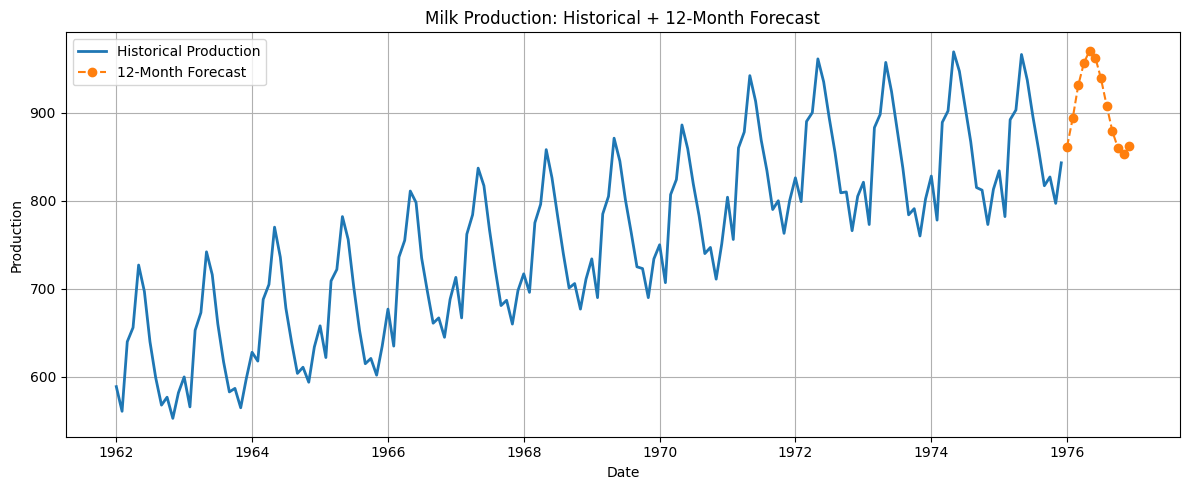

In [65]:
# 6. Plot history + forecast
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Production'], label='Historical Production', linewidth=2)
plt.plot(forecast_df['Date'], forecast_df['Forecast_Production'], label='12-Month Forecast', linestyle='--', marker='o')
plt.title('Milk Production: Historical + 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [66]:
print("Next 12 months forecast:")
print(forecast_df.to_string(index=False, formatters={'Forecast_Production': '{:.2f}'.format}))

Next 12 months forecast:
      Date Forecast_Production
1976-01-01              861.38
1976-02-01              894.27
1976-03-01              930.83
1976-04-01              956.64
1976-05-01              970.28
1976-06-01              962.51
1976-07-01              939.08
1976-08-01              907.95
1976-09-01              878.58
1976-10-01              859.68
1976-11-01              852.58
1976-12-01              861.70


In [ ]:
#Visualizing the predicted trend with uncertainty or confidence intervals

In [72]:
# Monte Carlo Forecast
def mc_dropout_prediction(model, input_data, runs=100):
    preds = []
    for i in range(runs):
        yhat = model(input_data, training=True)   # dropout active!
        preds.append(yhat.numpy().ravel()[0])
    return np.array(preds)

In [73]:
# Last observed window
last_window = series[-window_size:]
months = 12
forecast_means = []
forecast_lowers = []
forecast_uppers = []

current_window = last_window.copy()

for step in range(months):
    input_data = current_window.reshape((1, window_size, 1))
    
    # 100 predictions using dropout
    pred_samples = mc_dropout_prediction(model, input_data, runs=100)
    
    # Convert back to original scale
    pred_inv = scaler.inverse_transform(pred_samples.reshape(-1,1)).ravel()
    
    forecast_means.append(pred_inv.mean())
    forecast_lowers.append(np.percentile(pred_inv, 5))   # 5th percentile
    forecast_uppers.append(np.percentile(pred_inv, 95))  # 95th percentile
    
    # Update rolling window using MEAN prediction
    next_scaled = scaler.transform([[pred_inv.mean()]])[0][0]
    current_window = np.append(current_window[1:], next_scaled)


C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\91822\anaconda3\envs\datasci\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature nam

In [74]:
# Dates for forecast
forecast_dates = pd.date_range(df['Date'].iloc[-1] + pd.offsets.MonthBegin(1),
                               periods=months, freq='MS')


In [77]:
# Plot Historical + Forecast + Confidence Intervals
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Production'], label='Historical', linewidth=2)
plt.plot(forecast_dates, forecast_means, label='Forecast (Mean)', color='orange')

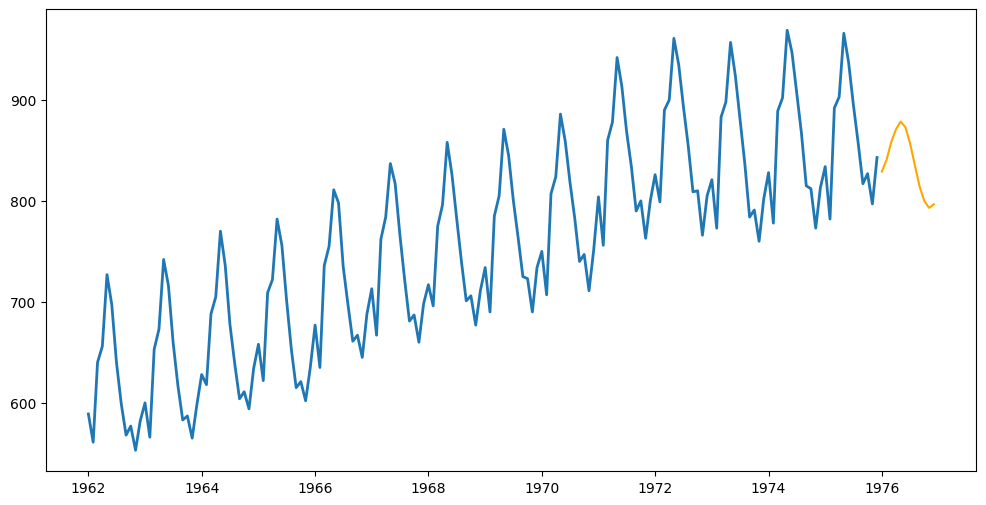

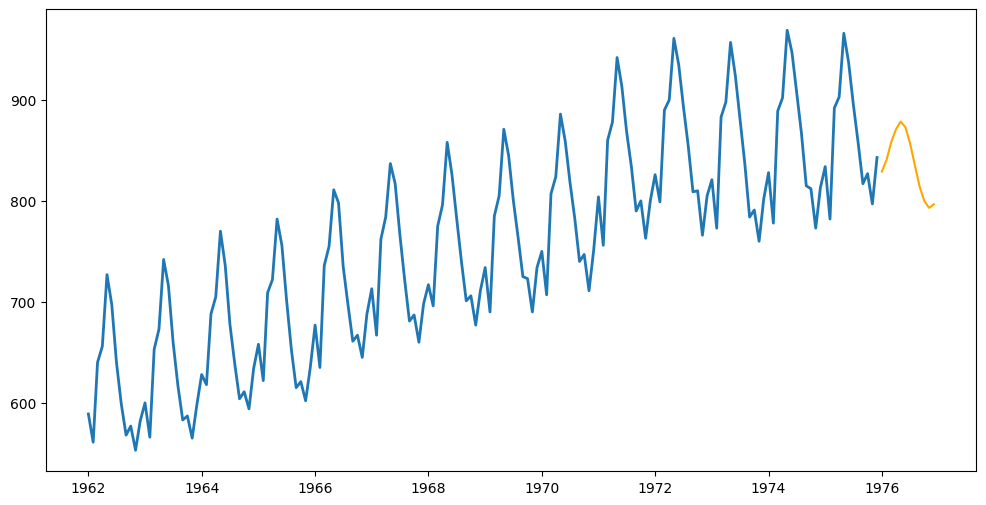

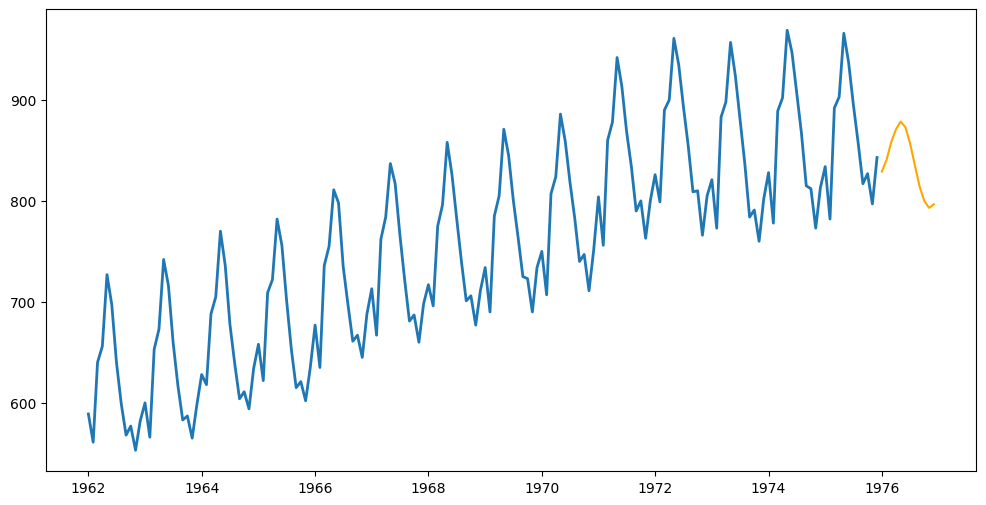

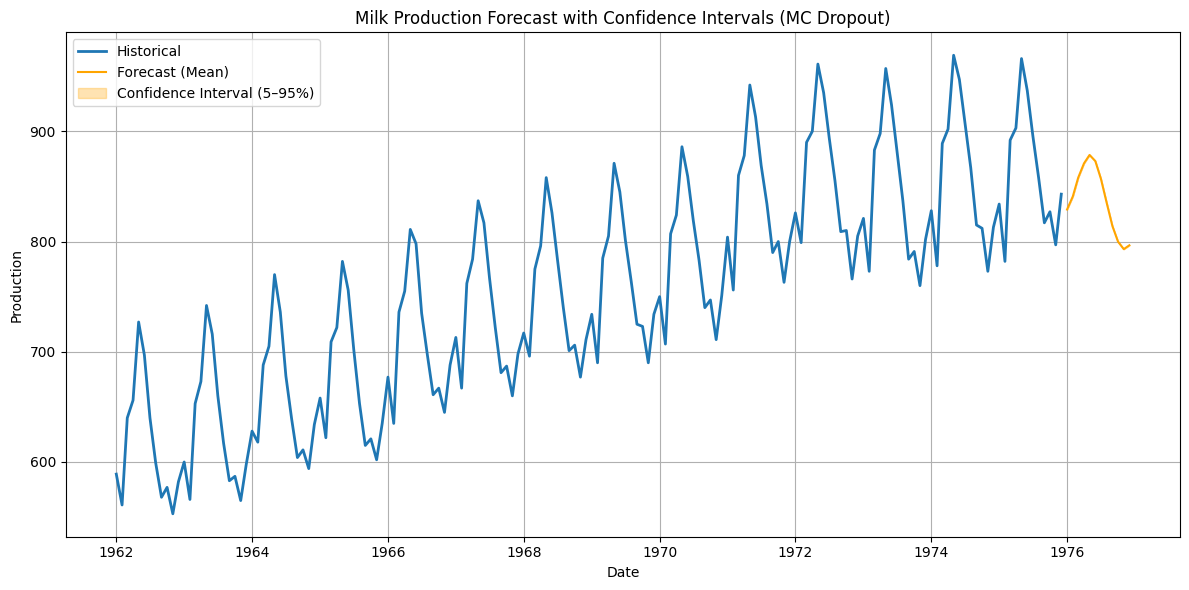

In [78]:
# Confidence band
plt.fill_between(forecast_dates, forecast_lowers, forecast_uppers,
                 color='orange', alpha=0.3, label='Confidence Interval (5–95%)')

plt.title("Milk Production Forecast with Confidence Intervals (MC Dropout)")
plt.xlabel("Date")
plt.ylabel("Production")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
#Business Insights

In [ ]:
#Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.

Ans- The forecast results, along with the confidence intervals, provide valuable insight for dairy business planning and strategic
decision-making. By understanding the projected milk production for the next 12 months, dairy managers can better anticipate
fluctuations in supply and prepare accordingly. Months showing higher predicted output allow the business to plan for increased
storage, packaging, and distribution capacity, while periods of lower expected production may warrant optimizing feed management,
adjusting workforce allocation, or securing supplemental milk sources to stabilize supply.
    The uncertainty bands (confidence intervals) help managers assess the risk of unexpected deviations, 
enabling them to plan conservatively during uncertain months. Overall, these forecasts support more efficient 
inventory management, pricing strategies, contract planning with buyers, and long-term resource allocation,
ultimately improving operational efficiency and profitability for the dairy business.